In [5]:
import numpy as np
from layers import Function, Layer, NeuralNetwork

import tensorflow_datasets as tfds
import tensorflow as tf

c:\Users\phiga\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Define functions

In [6]:
sigma = lambda x: 1/(1+np.exp(-x))
sigma_d =  lambda x: np.exp(-x)/(1+np.exp(-x))**2
sigmoid = Function(sigma, sigma_d)

def cost(Y, Yhat):
    loss = []
    for y, yhat in zip(Y.T, Yhat.T):
        loss.append(-(y*np.log(yhat) + (1-y)*np.log(1-yhat)))
    return np.mean(loss)

def cost_d(Y, Yhat):
    loss = []
    for y, yhat in zip(Y.T, Yhat.T):
        loss.append((yhat - y)/(yhat - yhat**2))
    loss = np.array(loss)
    return loss

cost_function = Function(cost, cost_d)

## Build dataset

In [7]:
BATCH_SIZE = 4

ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Define NN

In [8]:
nn = NeuralNetwork(.001, cost_function)
    
nn.add_layer(Layer((28*28, BATCH_SIZE), 28*28, sigmoid))
nn.add_layer(Layer((28*28, BATCH_SIZE), 10, sigmoid))

## Train

In [9]:
TRAIN_STEPS = 100
    
costs = []
i = 1

for example in tfds.as_numpy(ds):
    print(f'--> running step: {i}', end='\r')
    
    # learning rate schedule
    if i == 25 or i == 50 or i == 75:
        nn.learning_rate /= 100
        print(f'====== setting learning rate to {nn.learning_rate}')
    
    image, label = example["image"], example["label"]
    
    # preprocessing
    image = np.resize(image, (BATCH_SIZE, 28*28))
    image = np.moveaxis(image, [0,1], [1,0])
    
    label_vec = np.zeros((10, BATCH_SIZE))
    for u, l in enumerate(label):
        label_vec[l, u] = 1

    # correct datatypes
    image = image.astype(np.float64)
    
    cos = nn.train_step(image, label_vec)
    print(f'=== cost of step {i} was {cos}     ')
    costs.append(cos)
    
    if i == TRAIN_STEPS:
        break
    i += 1

=== cost of step 1 was 1.254069074179851     
=== cost of step 2 was 0.9706730627824033     
=== cost of step 3 was 0.5756897690905383     
=== cost of step 4 was 0.7174115238766475     
=== cost of step 5 was 0.7152769560710389     
=== cost of step 6 was 0.2933349946690801     
=== cost of step 7 was 0.36830960684261     
=== cost of step 8 was 0.3577707076859295     
=== cost of step 9 was 0.6112145418503048     
=== cost of step 10 was 0.4451499225666927     
=== cost of step 11 was 0.4637411983036344     
=== cost of step 12 was 0.5250737760926956     
=== cost of step 13 was 0.49635599361660265     
=== cost of step 14 was 0.5372185874053553     
=== cost of step 15 was 0.41969398215647036     
=== cost of step 16 was 0.5097541653520847     
=== cost of step 17 was 0.4696753981699439     
=== cost of step 18 was 0.5272520105630794     
=== cost of step 19 was 0.3817318731172127     
=== cost of step 20 was 0.5001768664352475     
=== cost of step 21 was 0.4645453599700794     
==

C:\Users\phiga\AppData\Local\Temp\ipykernel_11036\3107589359.py:1: RuntimeWarning: overflow encountered in exp
  sigma = lambda x: 1/(1+np.exp(-x))
C:\Users\phiga\AppData\Local\Temp\ipykernel_11036\3107589359.py:2: RuntimeWarning: overflow encountered in square
  sigma_d =  lambda x: np.exp(-x)/(1+np.exp(-x))**2


=== cost of step 31 was 0.43248590049687935     
=== cost of step 32 was 0.29417071916476584     
=== cost of step 33 was 0.4319651338739646     
=== cost of step 34 was 0.41319275385206816     
=== cost of step 35 was 0.28357074900632556     
=== cost of step 36 was 0.30335983489282453     
=== cost of step 37 was 0.362185964441837     
=== cost of step 38 was 0.5481618667442788     
=== cost of step 39 was 0.3390341441229634     
=== cost of step 40 was 0.3204611119190921     
=== cost of step 41 was 0.546236005624472     
=== cost of step 42 was 0.43869078986554955     
=== cost of step 43 was 0.4829006011951112     
=== cost of step 44 was 0.37558756958267725     
=== cost of step 45 was 0.3819097554467289     
=== cost of step 46 was 0.3896337397172071     
=== cost of step 47 was 0.5242003006581922     
=== cost of step 48 was 0.3051653099678055     
=== cost of step 49 was 0.5544145595856886     
====== setting learning rate to 1.0000000000000001e-07
=== cost of step 50 was 0.36

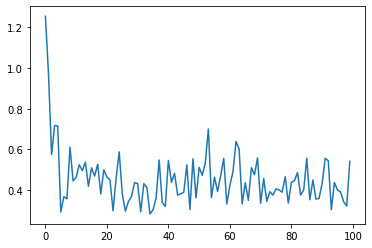

In [10]:
from matplotlib import pyplot as plt

plt.plot(costs)
plt.show()

## Inference

=== evaluating image
=== this image is an [9 3 1 7]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0.17703362 0.08925604 0.0970493  0.02508355]
 [0.00903339 0.10036131 0.04599159 0.10596797]
 [0.00216306 0.18716522 0.04137383 0.08354089]
 [0.01297471 0.15634408 0.04554058 0.06497675]
 [0.06819299 0.36101197 0.00941125 0.00324511]
 [0.00355722 0.00364446 0.26694827 0.01413626]
 [0.00093586 0.21233695 0.20298436 0.02014794]
 [0.06452959 0.02426917 0.35804381 0.02626265]
 [0.04231694 0.06775397 0.021484   0.33076412]
 [0.00460494 0.00424667 0.01247579 0.25682399]]


C:\Users\phiga\AppData\Local\Temp\ipykernel_11036\3107589359.py:1: RuntimeWarning: overflow encountered in exp
  sigma = lambda x: 1/(1+np.exp(-x))


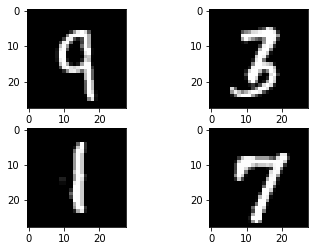

In [12]:
for example in tfds.as_numpy(ds):
    print(f'=== evaluating image')
    image, label = example["image"], example["label"]

    print(f'=== this image is an {label}')
    
    label_vec = np.zeros((10, BATCH_SIZE))
    for u, l in enumerate(label):
        label_vec[l, u] = 1
    print(label_vec)
    
    f, ax = plt.subplots(2,2)
    ax[0,0].imshow(image[0], cmap='gray')
    ax[0,1].imshow(image[1], cmap='gray')
    ax[1,0].imshow(image[2], cmap='gray')
    ax[1,1].imshow(image[3], cmap='gray')
    
    # preprocessing
    image_nn = np.resize(image, (BATCH_SIZE, 28*28))
    image_nn = np.moveaxis(image_nn, [0,1], [1,0])

    pred = nn.predict(image_nn)
    print(pred)
    
    plt.show()
    
    break